# Text Analysis Notebook

This notebook performs a comprehensive text analysis on a government program PDF. The analysis includes PDF processing, token statistics, part-of-speech and named entity analyses, word cloud generation, keyword extraction, entity network visualization, document structure analysis, and more.

In [36]:
# Import necessary libraries
import requests
import re
import spacy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pdfplumber as pp

from collections import Counter
from wordcloud import WordCloud
from spacy_layout import spaCyLayout

# Set visualization style
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (14, 8)

## 0. Setup 

### Get data




In [26]:
# url = 'https://b.ds.at/lido-files/2025/02/27/3dfd41d6-f95a-44f3-90b0-c6b15eff07de.pdf'

# r = requests.get(url, stream=True) # stream=True allows downloading large files in pieces
# chunk_size = 2000 # size of each chunk in bytes

# with open('../data/02_pdf-analysis/Regierungsprogramm_2025.pdf', 'wb+') as fd: # wb = write binary
#     for chunk in r.iter_content(chunk_size):
#         fd.write(chunk)


# alternatively, if file is small enough, you can use the following code to download the file
# with open('regierungsprogram.pdf', 'wb') as f:
#     f.write(r.content)

### Install language corpus

In [27]:
# %%bash
# python -m spacy download de_core_news_lg

     ━━╸━━━━━━━━━━━━━━━━━━━�━ 0.0/567.8 MB ? eta -:--:--��━━━━━━━━━━━ 0.3/567.8 MB ? eta -:--:--��━━━━━━━━━━━ 0.5/567.8 MB 1.5 MB/s eta 0:06:21��━━━━━━━━━━━ 0.8/567.8 MB 1.3 MB/s eta 0:07:02��━━━━━━━━━━━ 1.0/567.8 MB 1.4 MB/s eta 0:06:39��━━━━━━━━━━━ 1.6/567.8 MB 1.7 MB/s eta 0:05:37��━━━━━━━━━━━ 1.8/567.8 MB 1.5 MB/s eta 0:06:11��━━━━━━━━━━━ 2.1/567.8 MB 1.5 MB/s eta 0:06:19��━━━━━━━━━━━ 2.1/567.8 MB 1.5 MB/s eta 0:06:19��━━━━━━━━━━━ 2.6/567.8 MB 1.5 MB/s eta 0:06:24��━━━━━━━━━━━ 3.4/567.8 MB 1.7 MB/s eta 0:05:26��━━━━━━━━━━━ 3.7/567.8 MB 1.7 MB/s eta 0:05:24��━━━━━━━━━━━ 4.2/567.8 MB 1.8 MB/s eta 0:05:17��━━━━━━━━━━━ 4.5/567.8 MB 1.8 MB/s eta 0:05:11��━━━━━━━━━━━ 5.0/567.8 MB 1.8 MB/s eta 0:05:11��━━━━━━━━━━━ 5.5/567.8 MB 1.9 MB/s eta 0:04:59��━━━━━━━━━━━ 6.3/567.8 MB 2.0 MB/s eta 0:04:43��━━━━━━━━━━━ 6.6/567.8 MB 1.9 MB/s eta 0:04:48��━━━━━━━━━━━ 7.1/567.8 MB 2.0 MB/s eta 0:04:41��━━━━━━━━━━━━━━ 7.3/567.8 MB 2.0 MB/s eta 0:04:40��━━━━━━━━━━━━━━ 7.9/567.8 MB 2.0 MB/s eta 0:04:45��━━━

TypeError: %d format: a real number is required, not NoneType


Aborted.


## 1. Read data

In [28]:
# Load the German language model
print("Loading German language model...")
german_lang = spacy.load("de_core_news_lg")
german_lang.add_pipe('sentencizer')

Loading German language model...


In [ ]:
pdf_path = "data/02_pdf-analysis/Regierungsprogramm_2025.pdf"

with pp.open(pdf_path) as pdf:
    text = "\n".join([page.extract_text()
                      for page in pdf.pages if page.extract_text()])

text = re.sub(r'\n+', ' ', re.sub(r'\s+', ' ', text))
doc = german_lang(text)





## 2. Analysis

### 2.1 Word Cloud


Generating word cloud...


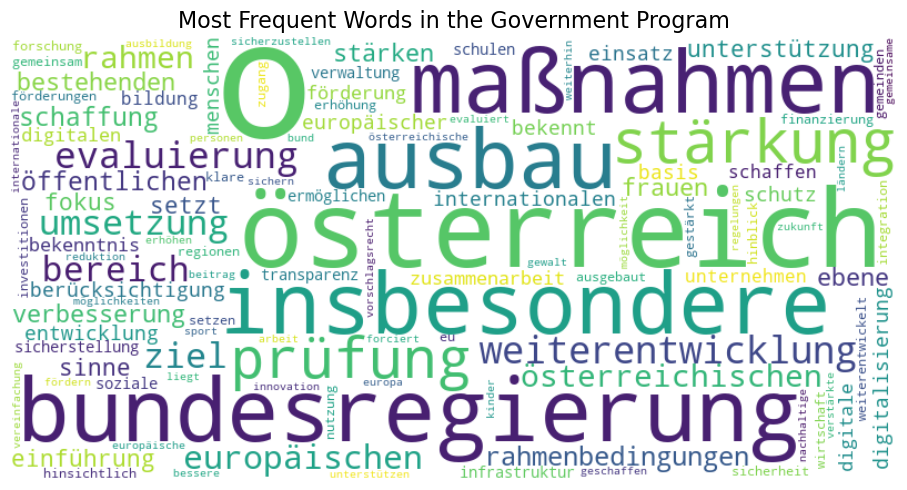

In [46]:
print("\nGenerating word cloud...")

def generate_wordcloud(text, title='Word Cloud', stopwords=None):
    # Filter out stopwords and punctuation
    if stopwords is None:
        stopwords = []

    # Create and generate a word cloud image
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white',
        stopwords=stopwords,
        min_font_size=10,
        max_font_size=150,
        collocations=False,
        random_state=42
    ).generate(text)

    # Display the generated image
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(title, fontsize=16)
    plt.tight_layout()
    plt.show()

# Create a list of tokens excluding stopwords and punctuation
filtered_tokens = [token.text.lower() for token in doc
                  if not token.is_stop and not token.is_punct and token.is_alpha]
filtered_text = " ".join(filtered_tokens)

# Generate word cloud
generate_wordcloud(filtered_text, title='Most Frequent Words in the Government Program')

## 2.2 Most Common Words


Analyzing most common nouns...


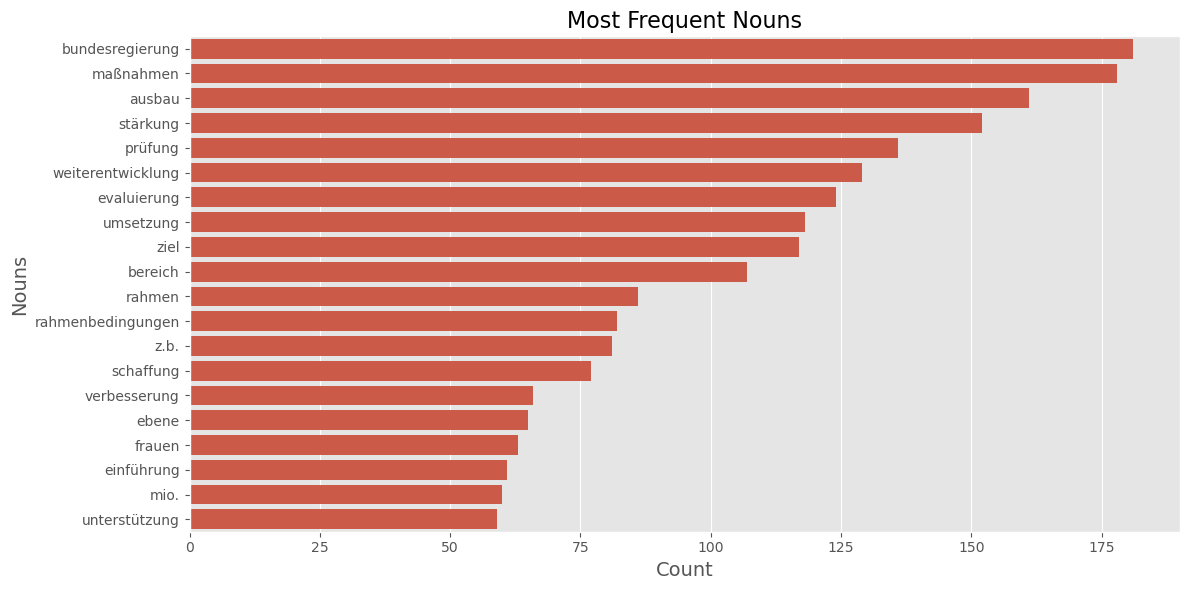

In [47]:
print("\nAnalyzing most common nouns...")
nouns = [token.text.lower() for token in doc if token.pos_ == 'NOUN' and not token.is_stop]
noun_counts = Counter(nouns).most_common(20)
noun_df = pd.DataFrame(noun_counts, columns=['Noun', 'Count'])

plt.figure(figsize=(12, 6))
sns.barplot(x='Count', y='Noun', data=noun_df)
plt.title('Most Frequent Nouns', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Nouns', fontsize=14)
plt.tight_layout()
plt.show()


Analyzing most common adjectives...


/var/folders/rz/q6x0q6d95wgbtn0lvy7_wcb00000gq/T/ipykernel_53679/1065056137.py:11: UserWarning: Glyph 61607 (\uf0a7) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/opt/homebrew/Caskroom/miniconda/base/envs/djpyworkshop/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 61607 (\uf0a7) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


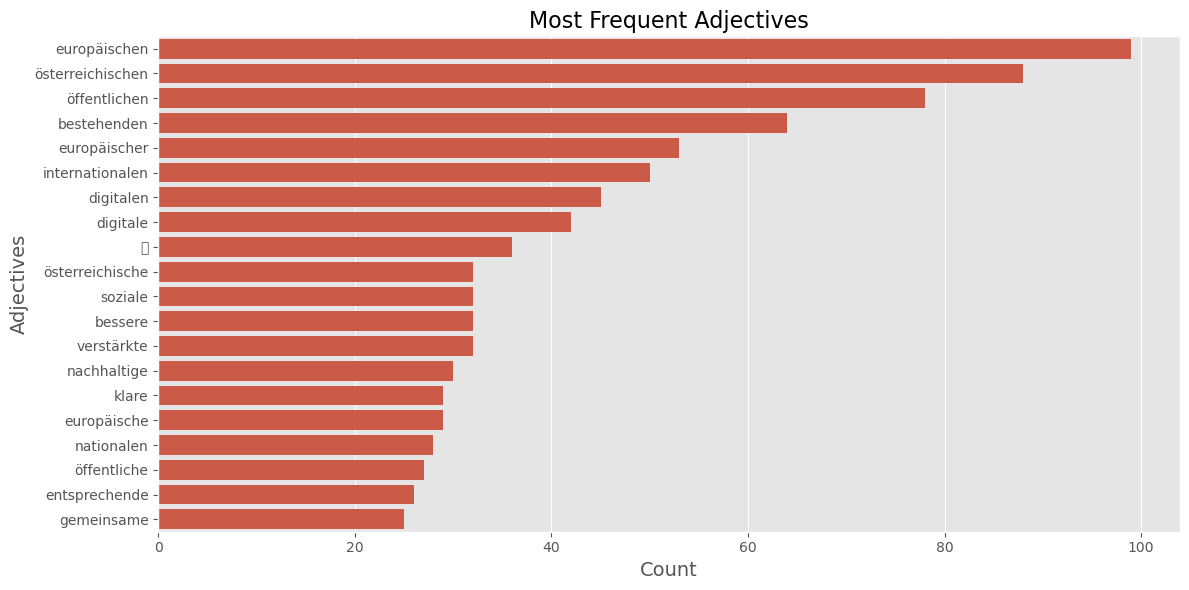

In [48]:
print("\nAnalyzing most common adjectives...")
adjectives = [token.text.lower() for token in doc if token.pos_ == 'ADJ' and not token.is_stop]
adj_counts = Counter(adjectives).most_common(20)
adj_df = pd.DataFrame(adj_counts, columns=['Adjective', 'Count'])

plt.figure(figsize=(12, 6))
sns.barplot(x='Count', y='Adjective', data=adj_df)
plt.title('Most Frequent Adjectives', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Adjectives', fontsize=14)
plt.tight_layout()
plt.show()

### 2.3 Sentence Length Analysis

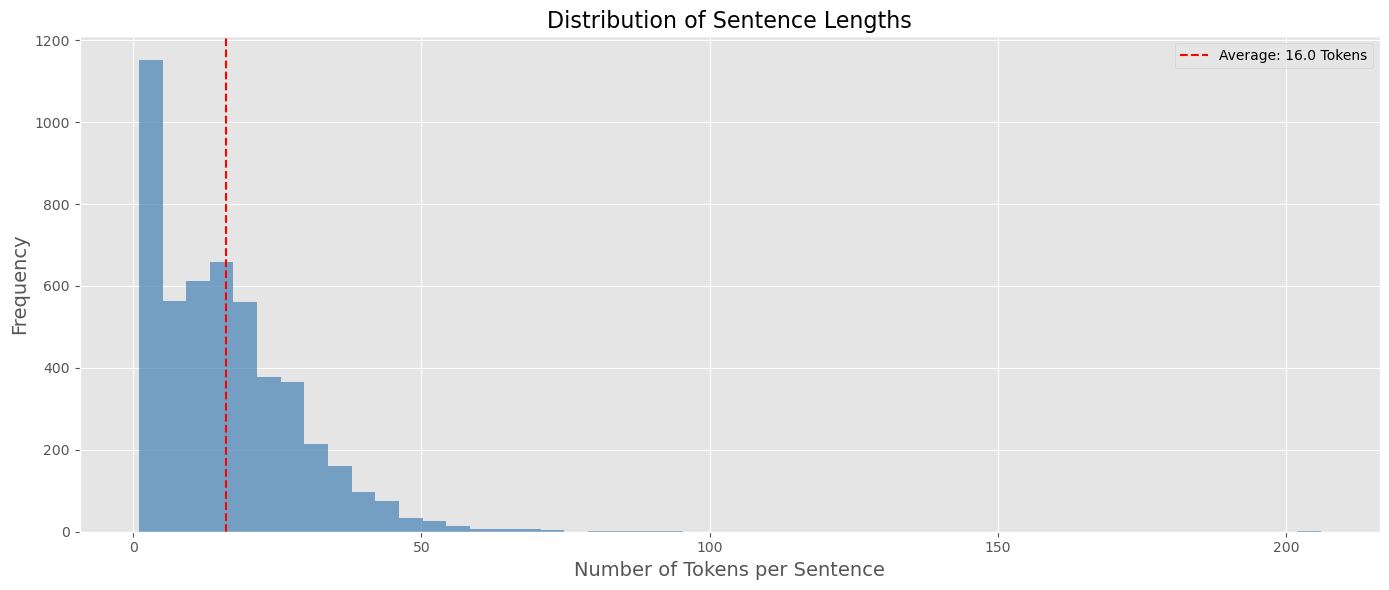

In [49]:
sentence_lengths = [len(sent) for sent in doc.sents]

plt.figure(figsize=(14, 6))
plt.hist(sentence_lengths, bins=50, alpha=0.7, color='steelblue')
plt.axvline(x=np.mean(sentence_lengths), color='red', linestyle='--',
            label=f'Average: {np.mean(sentence_lengths):.1f} Tokens')
plt.title('Distribution of Sentence Lengths', fontsize=16)
plt.xlabel('Number of Tokens per Sentence', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()

### 2.4 Summary

In [50]:
print("\n=== Summary of Text Analysis ===")
print(f"Document Length: {len(doc)} Tokens")
print(f"Unique Words: {len(set([token.text.lower() for token in doc if token.is_alpha]))}")
print(f"Number of Sentences: {len(list(doc.sents))}")
print(f"Average Sentence Length: {np.mean(sentence_lengths):.1f} Tokens")
print(f"Named Entities Found: {len(doc.ents)}")


=== Summary of Text Analysis ===
Document Length: 79188 Tokens
Unique Words: 11351
Number of Sentences: 4938
Average Sentence Length: 16.0 Tokens
Named Entities Found: 3010
Most Frequent Noun: bundesregierung (181 occurrences)
